In [1]:
import numpy
import matplotlib.pyplot as plt

**problema A**

un sacchetto contiene lo stesso numero di dadi a 4, 6, 8, 12 e 20 facce.

un amico prende un dado dal sacchetto effettua dei lanci e vi riporta il risultato: [4,8,3,5,7,7]. stabilite la probabilità a posteriori che abbia estratto ciascuno dei dadi in questione.

In [4]:
esiti=[4,8,3,5,7,7]
dadi=[4,6,8,12,20]

andiamo a descrivere la probabilità P(l|N) che dato un dado a N facce, l'esito di un lancio sia l e la probabilità P(L|N) che dato un dado a N facce otteniamo la serie di esiti L=$[l_1, l_2, ...]$

$P(l|N)=\begin{cases}
1/N & l \le N\\
0   & l > N \end{cases}$

e semplicemente:
$P(L|N)=\prod P(L_i| N)$

In [5]:
def probdl(N,l):
    if l<=N:
        return 1/N
    else:
        return 0

def probdL(N,L):
    r=1
    for l in L:
        r*=probdl(N,l)
    return r


In [11]:
probdL(4,esiti)

0.0

In [7]:
probdL(8,esiti)

3.814697265625e-06

**applichiamo la legge di Bayes**

$P(N|L)=\frac {P(L|N)P(N)}{P(L)}$

possiamo calcolare il difficile termine $P(L)$ a posteriori come fattore di normalizzazione.
perciò calcoleremo la probabilità non normalizzata:

    $p(N|L)=P(L|N)P(N)$

useremo un apriori piatto, P(N)=const=1/5, ma siete invitati a provare delle posizioni differenti.

In [8]:
p_N={N:probdL(N,esiti)/5 for N in dadi}
p_N

{4: 0.0,
 6: 0.0,
 8: 7.62939453125e-07,
 12: 6.697959533607681e-08,
 20: 3.125000000000001e-09}

In [9]:
#andiamo a normalizzare
norm=sum(p_N.values())
norm

8.330440484610768e-07

In [10]:
P_N={N:p/norm for N,p in p_N.items()}
P_N

{4: 0.0,
 6: 0.0,
 8: 0.91584527196901,
 12: 0.08040342579700498,
 20: 0.0037513022339850663}

***
## esercizio

avete catturato 8 carri armati nemici, che hanno i numeri di serie [5, 15, 25, 35, 45, 55, 65, 75], 
volete stabilire la credibilità che i nemici abbiano un certo numero di carri armati. 
sapete che i numeri di serie sono consecutivi e ritenete che non abbiano più di 300 carri.

- stabilite un modello non informato per la probabilità a priori e trovate il massimo e la media della distribuzione di probabilità corrispondente. potete considerare il campione sufficientemente diluito che le probabilità dei singoli numeri di serie siano indipendenti.

- usate un modello informato, dovuto a una stima indipendente dei vostri alleati: 
$P(N)= e^{-(N-90)^2/10}$ 

In [12]:
L=[5, 15, 25, 35, 45, 55, 65, 75]
pncarri=[probdL(N, L) for N in range(300)]

In [15]:
import matplotlib.pyplot as plt
import numpy as np

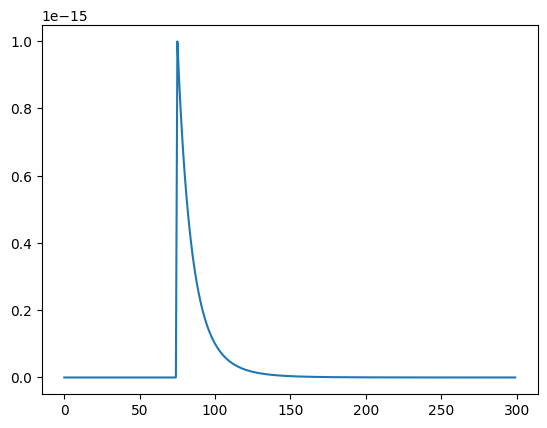

In [16]:
N=np.arange(300)
plt.plot(N, pncarri)

In [18]:
apriori=np.exp(-(N-90)**2/10)

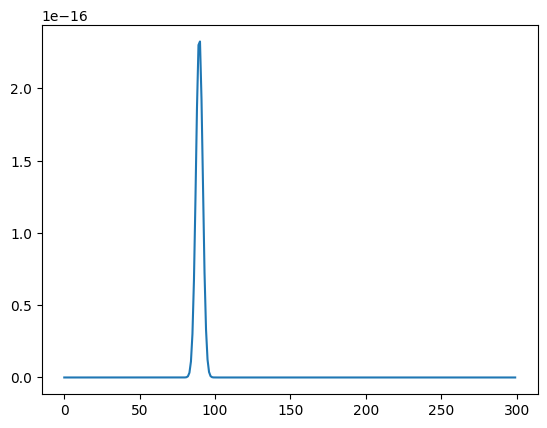

In [19]:
plt.plot(N, np.array(pncarri)*apriori)